# Logistic Regression

Some regression algorithms can be used for classification as well (and vice versa).

Logistic Regression (also called Logit Regression) is commonly used to estimate the probability that an instance belongs to a particular class.

**Logistic Regression model estimated probability (vectorized form)**

$$\hat{P} = h_\theta(X) = \sigma(X^T\theta)$$

The logistic—noted σ(·) is a sigmoid function that outputs a number between 0 and 1.

**Sigmoid function**

$$\sigma(t) = \frac{1}{1 + e^{-t}}$$

**Logistic Regression model prediction**

$$
\hat{y} = 
  \begin{cases}
    0 & \text{if } p < 0.5 \\
    1 & \text{if } p \ge 0.5 
  \end{cases}
$$

σ(t) < 0.5 when t < 0, and σ(t) ≥ 0.5 when t ≥ 0, 

so a Logistic Regression model predicts 1 if xT θ is positive, and 0 if it is negative.

**Cost function of a single training instance**
$$
c(\theta) = 
  \begin{cases}
    -log(\hat{p}) & \text{if } y = 1 \\
    -log(1 - \hat{p}) & \text{if } y = 0 
  \end{cases}
$$

**Logistic Regression cost function (log loss)**

$$ J(\theta) = \frac{1}{m} \sum_{i=1}^{m}[y^{(i)}log(\hat{p}^{(i)}) + (1 - y^{(i)})log(1 - \hat{p}^{(i)})]$$

There is no known closed-form equation to compute the value of θ that minimizes this cost function (there is no equivalent of the Normal Equation).

This cost function is convex, so Gradient Descent (or any other optimization algorithm) is guaranteed to find the global minimum (if the learn‐ ing rate is not too large and you wait long enough). 


**Logistic cost function partial derivatives**

$$ \frac{\partial}{\partial \theta_j} {J(\theta)} =  \frac{1}{m} \sum\limits_{i = 1}^{m} (\sigma(\theta^TX^{(i)}) - y^{(i)}) x_j^{(i)}$$

Once we have the gradient vector containing all the partial derivatives we can use it in the Batch Gradient Descent algorithm. 

For Stochastic GD we would just take one instance at a time, 

and for Mini-batch GD you would use a mini-batch at a time.

# Decision Boundaries

In [1]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

The standard Iris dataset has four features:

0: Sepal length
1: Sepal width
2: Petal length
3: Petal width

In [ ]:
X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(int)  # 1 if Iris virginica, else 0

 : before the comma means "select all rows."
 
 3: after the comma means "select columns starting from index 3 (the fourth column) and including all columns till the end
 
The variable X now holds a new array containing only the petal width values.

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X,y)

In [ ]:
import matplotlib.pyplot as plt
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")

In [ ]:
log_reg.predict([[1.5],[1.6],[1.7],[1.8]])

## Using 2 features

In [ ]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

X_2 = iris["data"][:, 2:3]  # petal width
y_2 = (iris["target"] == 2).astype(int)  # 1 if Iris virginica, else 0

log_reg_2 = LogisticRegression()
log_reg_2.fit(X_2,y_2)

log_reg.predict([[1.5,1.5],[3,1],[3,5],[5,1],[5,2]])

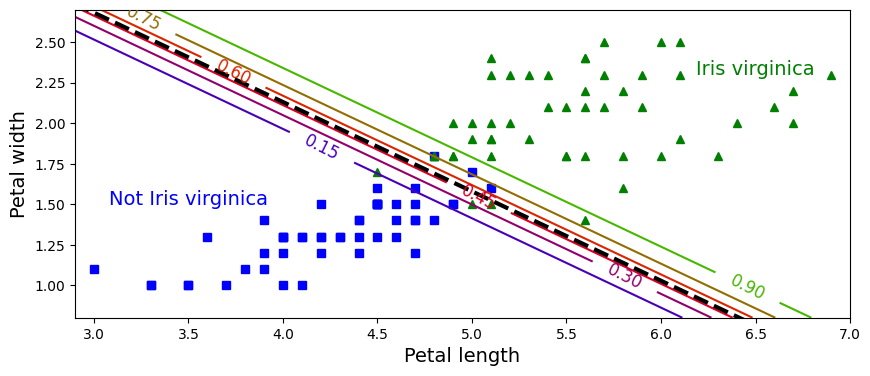

In [12]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(int)

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)

plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")

plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

-BFGS: Limited-memory Broyden–Fletcher–Goldfarb–Shanno

Optimization Algorithm: It is A method used to find the optimal set of parameters (weights and biases) for a machine learning model to minimize a given cost or loss function.

Performance: L-BFGS often shows faster convergence and higher accuracy compared to simpler optimization algorithms like gradient descent, especially for complex problems.

# Softmax Regression (Multinomial Logistic Regression)

when given an instance x, the Softmax Regression model first computes a score sk(x) for each class k, then estimates the probability of each class by applying the softmax function (also called the normalized exponential) to the scores.

**Softmax score for class k**
$$s_k = X^T\theta^{(k)}$$

Each class has its own dedicated parameter vector θ(k). All these vectors are typically stored as rows in a parameter matrix Θ.

Once we have computed the score of every class for the instance x, we can estimate the probability $\hat{p}_k$ that the instance belongs to class k by running the scores through the softmax function.

It computes the exponential of every score, then normalizes them (dividing by the sum of all the exponentials).

The scores are generally called logits or log-odds.

**Softmax function**

$$ \hat{p}_k = \sigma(s(x))_k = \frac{e^{s_k(x)}}{\sum_{j=1}^{K}e^{s_j(x)}}$$

- K is the number of classes.
- s(x) is a vector containing the scores of each class for the instance x.
- σ(s(x))k is the estimated probability that the instance x belongs to class k given the scores of each class for that instance.


The Softmax Regression classifier predicts the class with the highest estimated probability (which is simply the class with the highest score).

**Softmax Regression classifier prediction**

$$ \hat{y} = argmax_k (\sigma(s(x))_k )= argmax_k (s_k(x)) = argmax_k ((\theta^{(k)})^T x) $$

The argmax operator returns the value of a variable that maximizes a function. In this equation, it returns the value of k that maximizes the estimated probability σ(s(x))k

**NOTE:** The Softmax Regression classifier predicts only one class at a time (i.e., it is multiclass, not multioutput) so it should be used only with mutually exclusive classes such as different types of plants. You cannot use it to recognize multiple people in one picture